#### 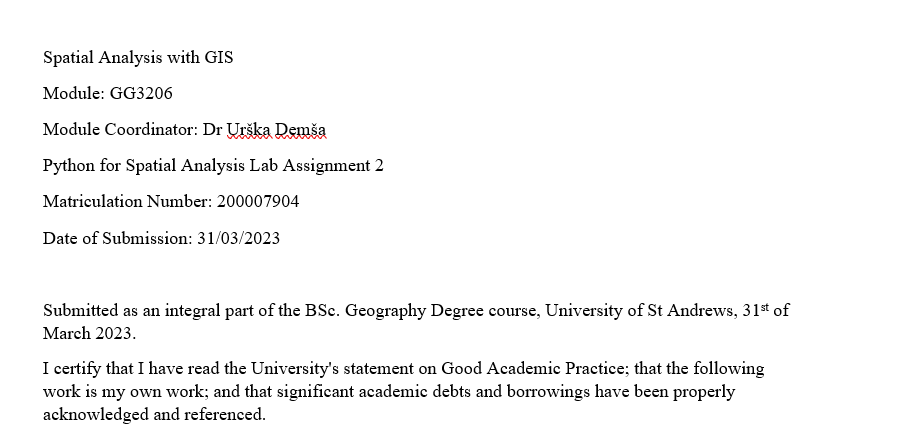

# Lab Assingment 2 - Annabel Anderson
# 200007904
# https://github.com/Annabelllllll/Lab-Assessment-2.git

#### Python Basics
#### Write Python code to perform the defined tasks. The tasks focus on the use of If…Else statements, for loops, and functions. Deliver your results in a Jupyter Notebook. Make sure all questions and answers are clearly labelled. The only python module that is required for this assignment is the math module

#### Task 1: Create an If...Else statement that will test whether a number is divisible by three. "YOUR VALUE is divisible by 3" should be printed if the value is divisible by three. "YOUR VALUE is not divisible by three" should be printed if it is not divisible by three. Test the statement on a numeric variable. Upper case text in the print statement should be replaced with the tested number

In [ ]:
import math

In [ ]:
x  = 12
if(x%3==0):
    print(str(x) + " is divisible by 3.")
else:
    print(str(x) + " is not divisible by 3.")

#### T2: Create an If...Else statement that will test whether a type of fruit, represented as a text string, is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry). If the fruit is on the list, the following should be printed: "YOUR FRUIT is acceptable." If not, then the following should be printed: "YOUR FRUIT is not acceptable." Upper case text in the print statement should be replaced with the tested fruit.

In [ ]:
a = "apple, orange, pear, kiwi, strawberry"
b = "apple"
if(b in a):
    print(str(b) + " is acceptable")
else:
    print(str(b) + " is not acceptable")

#### Create a function to calculate the distance between two coordinates using the haversine formula.
* Write the following formula where the input parameters are a pair of coordinates as two lists.
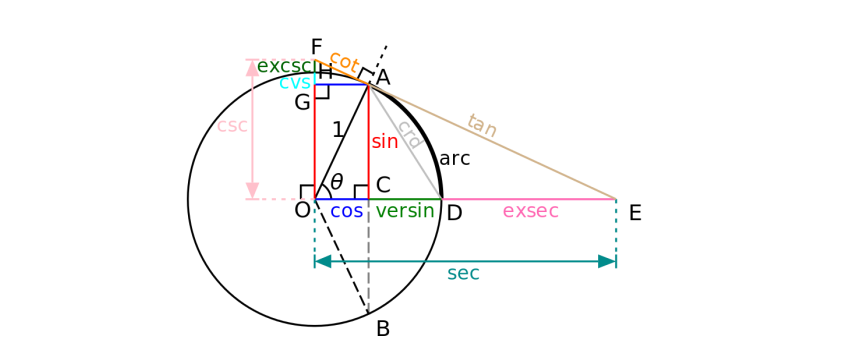
* The Haversine formula is the first equation to consider when calculating distances on a sphere.
* The word "Haversine" comes from the function: haversine(θ) = sin²(θ/2)
* The following equation where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) is how we translate the above formula to include latitude and longitude coordinates (A and B are the pair of coordinates). Note that angles need to be in radians to pass to trig functions:
* a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)
* c = 2 * atan2( √a, √(1−a) )
* d = R ⋅ c

In [ ]:
def haversine(lon1,lat1,lon2,lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2-lon1
    dlat = lat1-lat2
    a = math.sin(dlat/2)**2 + math.cos(lat1) * cos (lat2) * math.sin(dlon/2)**2
    c = 2*math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371
    return c * R
print(haversine)

#### Pandas and NumPy
#### This exercise focuses on the use of Pandas to query and summarise data. You will need to import the NumPy and Pandas libraries. Produce code to answer the questions below. Deliver your results in a Jupyter Notebook. Make sure all questions and answers are clearly labelled.
#### The portland_park_trees.csv file contains information about individual trees in city parks in Portland, Oregon. These data were obtained from the City of Portland Office of Parks & Recreation (https://www.portlandoregon.gov/parks/article/433143).

#### Question 1: How many trees are of the Quercus or Acer genus? 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("C:/Users/jiran/OneDrive - University of St Andrews/Geography/Year 3/Term 2/GIS/Lab Assessment 2/portland_park_trees.csv", sep=",",header=0)

TreeNum = df.query('Genus=="Quercus" or Genus=="Acer"')
print(len(TreeNum))
#this shows both 'Quercus' and 'Acers'

#TreeNum = df.query('Genus=="Quercus"')
##print(len(TreeNum))
###this shows the number of trees in just the 'Quercus' genus

#TreeNum = df.query('Genus=="Acer"')
##print(len(TreeNum))
######this shows the number of trees in just the 'Acer' genus


#### Q2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [ ]:
gdbh = df.query('Genus==("Quercus", "Acer") and DBH > 50')
print(len(gdbh))
#this shows both 'Quercus' and 'Acers' with a DBH > 50

#qdbh = df.query('Genus=="Quercus" and DBH > 50')
##print(len(qdbh))
####this shows just 'Quercus' with DBH > 50

#adbh = df.query('Genus=="Acer" and DBH > 50')
##print(len(adbh))
####this shows just 'Acer' with DBH > 50


#### Q3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus? 

In [ ]:
QFR = df.loc[df["Genus"].isin(["Quercus", "Acer", "Fraxinus"])]
Highest_Mean = QFR.groupby("Genus")["DBH"].mean().sort_values(ascending=False)
print(Highest_Mean)
#shows all 3 means
print(Highest_Mean.head(1))
#shows only the highest mean, which is the Quercus

#### Q4: How many different species of trees are recorded in the Acer genus? 

In [ ]:
Acer_Gen = df.loc[df["Genus"].isin(["Acer"])]
Acer_spec_count = Acer_Gen["Species"].count()
print (Acer_spec_count)

#### The world_cities.csv is a file that contains cities, countries, population, coordinates (geographic) and a Boolean attribute that defines if the city is the capital city or not. Read this file as a Pandas dataframe and create the required scripts to:

#### Q5:
* Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column.
* Remove the original "pop" column.
* Choose/subset a city that starts with the same letter as your first name (for example, "Mexico City" if your first name is Michael).
* Subset the five biggest (i.e., largest population sizes) cities from the country where your selected city is.
* Print the result.
* Make sure you write the scripts in different code cells where you describe the process

In [ ]:
#Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column.
df_cities = pd.read_csv("C:/Users/jiran/OneDrive - University of St Andrews/Geography/Year 3/Term 2/GIS/Lab Assessment 2/world_cities.csv", sep=",",header=0)
df_cities["pop_M"] = df_cities["pop"] / 1000000
print(df_cities)

In [ ]:
#Remove the original "pop" column
df_cities = df_cities.drop(['pop'], axis=1)
print(df_cities)

In [ ]:
#Choose/subset a city that starts with the same letter as your first name (for example, "Mexico City" if your first name 
#is Michael).
#Aberdeen 
Aberdeen_ss = df_cities[(df_cities["city"]=="Aberdeen")][["city", "country"]]
print(Aberdeen_ss.head(1))
#Aberdeen is in the UK 

In [ ]:
#Subset the five biggest (i.e., largest population sizes) cities from the country where your selected city is.

#create a subset of just the UK data
uk_data = df_cities[df_cities["country"]=="UK"]
#print(uk_data)

#subset out the 5 cities with the largest population (pop_M value) 
top5 = uk_data[uk_data['pop_M'] > 0.457874]
print(top5.head)


In [ ]:
#use .nlargest to display them from fifth to first largest 
uk_data.nlargest(5, 'pop_M')


#### Python Data Visualization
#### Using the same dataset portland_park_trees.csv, create using seaborn, pandas or matplotlib libraries the following charts:

#### Graph 1: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis (Hint: You will need to use the “Genus”, “DBH”, and  “TreeHeight” attributes.). 

In [ ]:
import matplotlib.pyplot as plt # alias is plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
import seaborn as sns


In [ ]:
u_tree_sp = df[(df["Genus"]=="Ulmus")] #subsetting a small portion of our previously created dataframe
graph1 = u_tree_sp.plot.scatter(x='DBH', y='TreeHeight', title='Scatter Plot")

#### G2: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the “Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)


In [ ]:
graph2 = sns.relplot(data=u_tree_sp, x = "DBH", y = "TreeHeight", hue = "Genus_spec")

#### G3: Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot).

In [ ]:
graph3 = u_tree_sp.boxplot(column='DBH', by='Genus_spec')
graph3.set_xticklabels(graph3.get_xticklabels(), rotation=40, ha="right")

#### G4: Combine Graphs 1 and 3 into a single figure. Do not plot a legend for any of the graphs.

In [ ]:
plt.rcParams['figure.figsize'] = [12, 4] 
fig1, axs = plt.subplots(1,2)
axs[0].scatter(u_tree_sp.DBH, u_tree_sp.TreeHeight)
axs[1].boxplot(u_tree_sp.DBH) # there is no way to work this out from lab data, and when you include anything relating to
                              #by='Genus_spec' an error occurs and the plot where the box plot is remains empty.
plt.show(fig1)

#### Python GeoPandas
#### Go to the Spatial Data Portal of Scotland and find any spatial data that you find interesting in a shapefile format. Download this data and Produce code to complete the requested tasks

#### Task 1: Read the selected dataset as GeoPandas DataFrame

In [ ]:
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot
plt.rcParams['figure.figsize'] = [10, 8]

In [ ]:
scot_map= gpd.read_file('SG_SIMD_2016.shp')
print(scot_map)


#### T2: Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

In [ ]:
print(scot_map.head())
print(scot_map.tail())

####  Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip.


In [ ]:
scot_map.explore(column='Shape_Area', cmap='RdYlBu')
#ToolTip is included in this map without needing to be written in

#### T4. What is the Coordinate Reference System of the selected dataset?

In [ ]:
print(scot_map.crs)

#### T5. How many features does the selected dataset contain?

In [ ]:
print(len(scot_map)) 

#### T6. Define a sub-setting criterion to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

In [ ]:
cat = scot_map['LAName'] == 'Aberdeen City'
new_map_cat =  scot_map[cat]
new_map_cat.head()

#### T7. Define a sub-setting criterion to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute

In [ ]:
num = scot_map['Percentile'] > 50
new_map_num =  scot_map[num]
new_map_num.head()

#### T8. Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map

In [ ]:
new_map_num.plot(column='Percentile');


#### Python Rasterrio
#### The dataset for this part of the assignment is elev.tif a 30 m spatial resolution digital elevation model (DEM) derived from the National Elevation Dataset (NED) in Canada with elevation in meters

#### Task 1. Read the file as a rasterio dataset

In [ ]:
elev = rio.open('elev.tif')
elev_arr = elev.read(1, masked=True)
print(elev_arr)
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == 0)) 
print (image_read_masked)

#### T2: What is the CRS of the dataset?

In [ ]:
print(elev.crs)

#### T3: Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset

In [ ]:
print(elev.bounds)
print(elev.crs)
print(elev.count)

#### T4: Create a plot/map of the raster dataset.

In [ ]:
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == 0))
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(image_read_masked, cmap="gist_gray")

#### T5: Create Histograms from the raster.

In [ ]:
pip install earthpy

In [ ]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [ ]:
ep.hist(elev_arr)
plt.show()